# Wine List Analysis

This analysis provide appropriate customer insights to enable Wine List Corporation develop a targeted marketing and sales strategy so as to maximize sales dollars and minimize marketing dollars

In [97]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

- - -

## Load Wine Marketing Data

In [3]:
file_path = Path('./Data/marketing_data.csv')
wine_data = pd.read_csv(file_path, encoding='UTF-8')
wine_data.head()

,CustId,BirthYear,Education,MaritalStat,AnnualInc,NumKids,NumTeen,DateEnrol,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,1985,Graduation,Married,70951.0,0,0,4/5/2013,66,239,...,1,0,0,0,0,0,0,3,11,0
1,1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,464,...,5,0,0,0,0,1,0,3,11,1
2,9,1975,Master,Single,46098.0,1,1,18-08-2012,86,57,...,8,0,0,0,0,0,0,3,11,0
3,13,1947,PhD,Widow,25358.0,0,1,22-07-2013,57,19,...,6,0,0,0,0,0,0,3,11,0
4,17,1971,PhD,Married,60491.0,0,1,6/9/2013,81,637,...,5,0,0,0,0,0,0,3,11,0


- - -

## Data Pre-Processing

In [4]:
# Checking if the data has been correcly fully loaded (Rows x Columns)
wine_data.shape

(2240, 29)

In [5]:
# Checking all the columns in the data that we required for analysis
wine_data.columns

Index(['CustId', 'BirthYear', 'Education', 'MaritalStat', 'AnnualInc',
       'NumKids', 'NumTeen', 'DateEnrol', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
# Drop all the unwanted columns
wine_data.drop(columns=['Z_CostContact', 'Z_Revenue', 'Response', 'MntGoldProds'], inplace=True)
wine_data.head()

,CustId,BirthYear,Education,MaritalStat,AnnualInc,NumKids,NumTeen,DateEnrol,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,0,1985,Graduation,Married,70951.0,0,0,4/5/2013,66,239,...,3,4,9,1,0,0,0,0,0,0
1,1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,464,...,7,3,7,5,0,0,0,0,1,0
2,9,1975,Master,Single,46098.0,1,1,18-08-2012,86,57,...,3,2,2,8,0,0,0,0,0,0
3,13,1947,PhD,Widow,25358.0,0,1,22-07-2013,57,19,...,1,0,3,6,0,0,0,0,0,0
4,17,1971,PhD,Married,60491.0,0,1,6/9/2013,81,637,...,6,11,7,5,0,0,0,0,0,0


In [7]:
# Checking data types
wine_data.dtypes

CustId                   int64
BirthYear                int64
Education               object
MaritalStat             object
AnnualInc              float64
NumKids                  int64
NumTeen                  int64
DateEnrol               object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
dtype: object

In [8]:
# Checking if there any negative values for all the numeric columns which are required for analysis
print('Number of Negative values in AnnualInc column: ', len(wine_data.loc[wine_data['AnnualInc'] < 0]))
print('Number of Negative values in BirthYear column: ', len(wine_data.loc[wine_data['BirthYear'] < 0]))
print('Number of Negative values in NumKids column: ', len(wine_data.loc[wine_data['NumKids'] < 0]))
print('Number of Negative values in NumTeen column: ', len(wine_data.loc[wine_data['NumTeen'] < 0]))
print('Number of Negative values in Recency column: ', len(wine_data.loc[wine_data['Recency'] < 0]))
print('Number of Negative values in MntWines column: ', len(wine_data.loc[wine_data['MntWines'] < 0]))
print('Number of Negative values in MntFruits column: ', len(wine_data.loc[wine_data['MntFruits'] < 0]))
print('Number of Negative values in MntMeatProducts column: ', len(wine_data.loc[wine_data['MntMeatProducts'] < 0]))
print('Number of Negative values in MntFishProducts column: ', len(wine_data.loc[wine_data['MntFishProducts'] < 0]))
print('Number of Negative values in MntSweetProducts column: ', len(wine_data.loc[wine_data['MntSweetProducts'] < 0]))
print('Number of Negative values in NumDealsPurchases column: ', len(wine_data.loc[wine_data['NumDealsPurchases'] < 0]))
print('Number of Negative values in NumWebPurchases column: ', len(wine_data.loc[wine_data['NumWebPurchases'] < 0]))
print('Number of Negative values in NumCatalogPurchases column: ', len(wine_data.loc[wine_data['NumCatalogPurchases'] < 0]))
print('Number of Negative values in NumStorePurchases column: ', len(wine_data.loc[wine_data['NumStorePurchases'] < 0]))
print('Number of Negative values in NumWebVisitsMonth column: ', len(wine_data.loc[wine_data['NumWebVisitsMonth'] < 0]))

Number of Negative values in AnnualInc column:  0
Number of Negative values in BirthYear column:  0
Number of Negative values in NumKids column:  0
Number of Negative values in NumTeen column:  0
Number of Negative values in Recency column:  0
Number of Negative values in MntWines column:  0
Number of Negative values in MntFruits column:  0
Number of Negative values in MntMeatProducts column:  0
Number of Negative values in MntFishProducts column:  0
Number of Negative values in MntSweetProducts column:  0
Number of Negative values in NumDealsPurchases column:  0
Number of Negative values in NumWebPurchases column:  0
Number of Negative values in NumCatalogPurchases column:  0
Number of Negative values in NumStorePurchases column:  0
Number of Negative values in NumWebVisitsMonth column:  0


In [9]:
# Formatting 'DateEnrol' column with correct and consistent date format
wine_data['DateEnrol'] = pd.to_datetime(wine_data['DateEnrol'], infer_datetime_format=True)
wine_data['DateEnrol'].head()

0   2013-04-05
1   2014-06-15
2   2012-08-18
3   2013-07-22
4   2013-06-09
Name: DateEnrol, dtype: datetime64[ns]

In [10]:
# Create a new Age column based on BirthYear
wine_data['Age'] = pd.Timestamp('now').year - wine_data['BirthYear']
wine_data.drop(columns='BirthYear', inplace=True)
wine_data.head()

,CustId,Education,MaritalStat,AnnualInc,NumKids,NumTeen,DateEnrol,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age
0,0,Graduation,Married,70951.0,0,0,2013-04-05,66,239,10,...,4,9,1,0,0,0,0,0,0,36
1,1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,3,7,5,0,0,0,0,1,0,60
2,9,Master,Single,46098.0,1,1,2012-08-18,86,57,0,...,2,2,8,0,0,0,0,0,0,46
3,13,PhD,Widow,25358.0,0,1,2013-07-22,57,19,0,...,0,3,6,0,0,0,0,0,0,74
4,17,PhD,Married,60491.0,0,1,2013-06-09,81,637,47,...,11,7,5,0,0,0,0,0,0,50


In [68]:
# Create an Age Group column for market segment analysis
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
wine_data['Age Group'] = pd.cut(wine_data['Age'], [20,30,40,50,60,70,80,130], labels=labels)
wine_data['Age Group'].head()

0    30-40
1    50-60
2    40-50
3    70-80
4    40-50
Name: Age Group, dtype: category
Categories (7, object): [20-30 < 30-40 < 40-50 < 50-60 < 60-70 < 70-80 < 80+]

In [77]:
# Create an Income Bracket column for market segment analysis
labels = ['Below 20K', '20K-30K', '30K-40K', '40K-50K','50K-60K', '60K-70K', '70K-80K', '80K-90K', '90K-100K', '100K-150K', '150K-200K', 'Over 200K']
wine_data['Income Bracket'] = pd.cut(wine_data['AnnualInc'], [-np.inf,20000,30000,40000,50000,60000,70000,80000,90000,100000,150000,200000,np.inf], labels=labels)
wine_data['Income Bracket'].head()

0    70K-80K
1    50K-60K
2    40K-50K
3    20K-30K
4    60K-70K
Name: Income Bracket, dtype: category
Categories (12, object): [Below 20K < 20K-30K < 30K-40K < 40K-50K ... 90K-100K < 100K-150K < 150K-200K < Over 200K]

In [11]:
# Dropping if there is any duplicate rows
wine_data.drop_duplicates(inplace=True)

In [12]:
# Checking required Category columns value counts
wine_data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [163]:
# Rename 2n Cycle to 'Undergraduate'
wine_data.loc[wine_data['Education'] == '2n Cycle', 'Education'] = 'Undergraduate'
wine_data['Education'].value_counts()

Graduation       1127
PhD               486
Master            370
Undergraduate     203
Basic              54
Name: Education, dtype: int64

In [13]:
wine_data['MaritalStat'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: MaritalStat, dtype: int64

In [14]:
# 'Absurd' and 'YOLO' does not have a meaning full contibution to the analysis
# So, replacing them with the most frequent value in MaritalStat column which is 'Married'
# Removing those 4 rows NOT an option since there's limited number of data 
# and other attributes on those rows can impact on the analysis
wine_data.loc[wine_data['MaritalStat']=='Absurd', 'MaritalStat'] = 'Married'
wine_data.loc[wine_data['MaritalStat']=='YOLO', 'MaritalStat'] = 'Married'
wine_data['MaritalStat'].value_counts()

Married     868
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Name: MaritalStat, dtype: int64

- - -

## Customer Segments Analysis

In [60]:
# Wine consumption based on Age Groups
df = wine_data.groupby('Age Group').count()['CustId']
df.hvplot.bar(x='Age Group', xlabel='Age Group', ylabel='Number of Consumers', title='Wine consumption based on Age Groups')

:Bars   [Age Group]   (CustId)

In [100]:
# Total Wine Sales per Income Bracket
df = wine_data.groupby('Income Bracket').sum()['MntWines']
df.hvplot.barh(x='Income Bracket', y='MntWines', xlabel='Income Bracket', ylabel='Total Wine Sales ($)', xformatter='%.0f', title='Total Wine Sales per Income Bracket')

:Bars   [Income Bracket]   (MntWines)

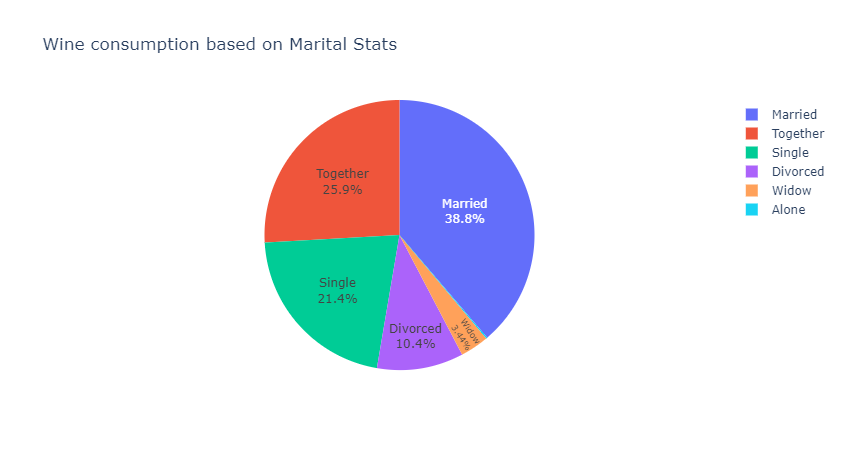

In [202]:
# Wine consumption based on Marital Stats
df = wine_data.groupby('MaritalStat').count()['CustId'].reset_index()
df = df.rename(columns={'CustId':'count'})
fig = px.pie(df, names='MaritalStat', values='count', title='Wine consumption based on Marital Stats')
fig.update_traces(textposition='inside', textinfo='percent+label')

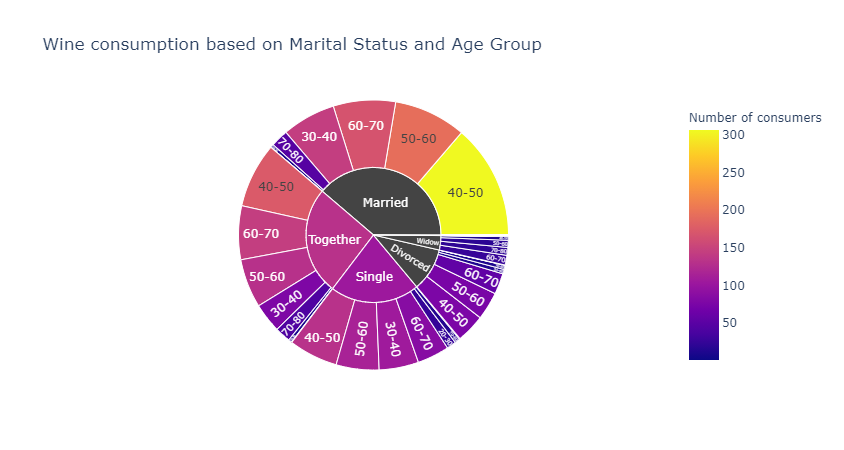

In [175]:
df = wine_data.groupby(['MaritalStat','Age Group']).count()['CustId'].reset_index()
df = df.rename(columns={'CustId':'Number of consumers'})
px.sunburst(
    df, 
    path=['MaritalStat','Age Group'],
    values='Number of consumers',
    color='Number of consumers',
    title='Wine consumption based on Marital Status and Age Group')

In [174]:
df = wine_data.groupby(['Education', 'MaritalStat']).sum()['MntWines']
df.hvplot.bar(xlabel='Education and Marital Stat', ylabel='Total Sales ($)', title='Total Sales based on Education and Marital Stat', rot=90, yformatter='%.0f')

:Bars   [Education,MaritalStat]   (MntWines)

- - -

## Customer Purchasing Analysis

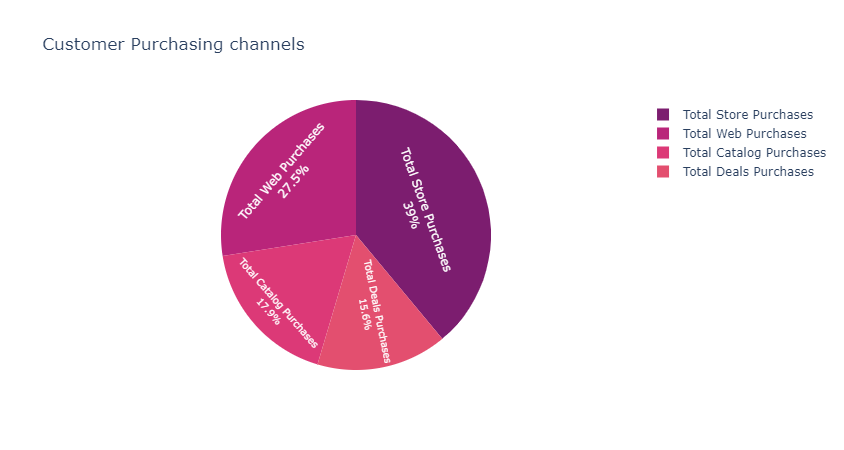

In [238]:
# Customer Purchasing channels
df = wine_data[['NumWebPurchases','NumDealsPurchases','NumCatalogPurchases','NumStorePurchases']].sum()
fig = px.pie(df, names=['Total Web Purchases','Total Deals Purchases','Total Catalog Purchases','Total Store Purchases'], 
       values=[df[0],df[1],df[2],df[3]],
        color_discrete_sequence=px.colors.sequential.Sunsetdark_r,
            title='Customer Purchasing channels')
fig.update_traces(textposition='inside', textinfo='percent+label')

- - -

## Campaign Performances Analysis

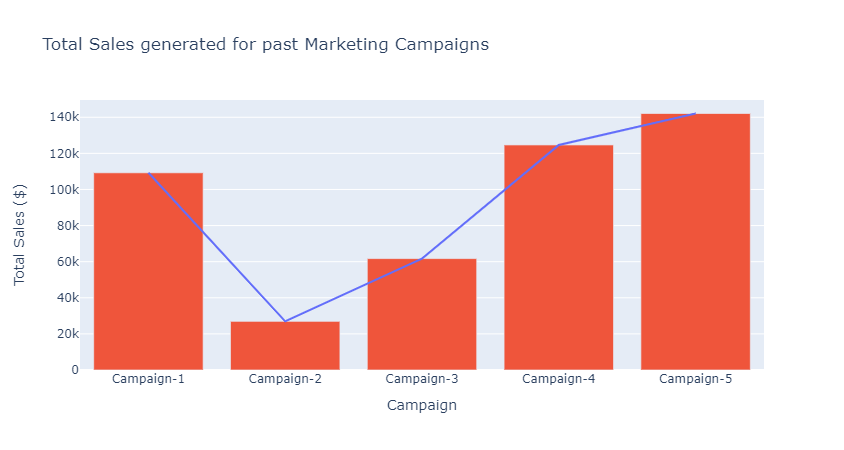

In [266]:
# Calculating each Marketing Campaign sales figues based on Customer Acceptance
campaign_1_total_sales = wine_data.loc[wine_data['AcceptedCmp1'] == 1].sum()['MntWines']
campaign_2_total_sales = wine_data.loc[wine_data['AcceptedCmp2'] == 1].sum()['MntWines']
campaign_3_total_sales = wine_data.loc[wine_data['AcceptedCmp3'] == 1].sum()['MntWines']
campaign_4_total_sales = wine_data.loc[wine_data['AcceptedCmp4'] == 1].sum()['MntWines']
campaign_5_total_sales = wine_data.loc[wine_data['AcceptedCmp5'] == 1].sum()['MntWines']

# Create a new DataFrame based on these data
df = pd.DataFrame({
    'Campaign':['Campaign-1', 'Campaign-2', 'Campaign-3', 'Campaign-4', 'Campaign-5'],
    'Total Sales ($)': [campaign_1_total_sales, 
                        campaign_2_total_sales, 
                        campaign_3_total_sales, 
                        campaign_4_total_sales, 
                        campaign_5_total_sales]
})

# Added a Trend line over the bar
fig = px.line(df, x='Campaign', y='Total Sales ($)', title='Total Sales generated for past Marketing Campaigns')

# Plotting a bar graph
fig.add_bar(x=['Campaign-1', 'Campaign-2', 'Campaign-3', 'Campaign-4', 'Campaign-5'], 
            y=[campaign_1_total_sales, 
               campaign_2_total_sales, 
               campaign_3_total_sales, 
               campaign_4_total_sales, 
               campaign_5_total_sales], 
            showlegend=False)